# Checkpoint 3  de Data Science & Statistical Computing - 2ESPW
- Eduardo Araujo de Andrade Junior (RM99758)
- Gabriela Trevisan da Silva (RM99500)
- Rafael Henrique Pedra Franck (RM550785)

### Introdução do Projeto

Este projeto realiza uma análise detalhada de um dataset do setor de moda, focado em produtos premium e de luxo. O dataset utilizado foi obtido através do Kaggle (https://www.kaggle.com/datasets/justinpakzad/ssense-fashion-dataset), que contém mais de 19.000 itens, abrangendo quatro colunas principais:

1. **Marca (brand)**: Identifica a marca de cada item, permitindo análises de popularidade e comparação de preços entre diferentes fabricantes.
2. **Descrição (description)**: Contém uma descrição detalhada de cada produto, fornecendo informações sobre o estilo e os materiais, e possibilitando análise textual para caracterizar melhor os produtos.
3. **Preço em Dólares (price_usd)**: Indica o preço de cada item em dólares, essencial para análises de faixa de preço e categorização dos produtos como acessíveis, intermediários ou de luxo.
4. **Tipo de Público (type)**: Especifica o público-alvo (como produtos masculinos), ajudando na segmentação dos dados por tipo de consumidor.

### Objetivo do Projeto

A análise visa responder a questões sobre o comportamento de preços, tendências de marca e classificação de produtos. Os objetivos incluem:

- **Enriquecimento de Dados**: Adicionar valores convertidos para euros e categorizar os preços, oferecendo uma perspectiva adicional sobre o mercado europeu.
- **Exploração e Limpeza**: Preparar e refinar os dados, com foco na padronização e remoção de duplicatas.
- **Modelagem e Predição**: Aplicar algoritmos de Machine Learning para prever faixas de preço e classificar tipos de produtos com base nas descrições e marcas.
- **Visualizações Avançadas**: Utilizar gráficos e visualizações avançadas para facilitar a interpretação dos dados e das conclusões.

Esse processo segue uma metodologia estruturada, desde a coleta e preparação dos dados até a análise final e a criação de modelos preditivos, oferecendo uma compreensão aprofundada sobre o mercado de moda de luxo.

### Questões Selecionadas
1. Qual é a distribuição das categorias de preço no dataset?
2. Existem diferenças significativas nos preços entre as marcas mais populares?
3. Como o tipo de público impacta o preço do produto?
4. Qual é a faixa de preço mais comum em cada tipo de público?
5. É possível prever a categoria de preço (luxo, intermediário, acessível) com base no preço?
6. Há relação entre a marca e o tipo de produto oferecido?
7. A categoria de preço afeta a probabilidade de um produto ser masculino, feminino ou unissex?
8. Qual modelo de Machine Learning é mais eficaz para classificar produtos por tipo?
9. Quais variáveis têm maior influência na previsão da faixa de preço?
10. A distribuição de preços em USD e BRL é consistente entre as marcas principais?

 As 10 questões serão respondidas por meio de análises descritivas e comparativas, incluindo modelos de Machine Learning.

In [ ]:
# importando bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# importando o dataframe e vendo suas primeiras linhas
data = pd.read_csv('ssense_dataset.csv')
data.head()

,brand,description,price_usd,type
0,Rick Owens,Black Moncler Edition Down Coat,2585,mens
1,Rick Owens,Black Moncler Edition Cyclopic Down Coat,2405,mens
2,Rick Owens,Black Moncler Edition Cyclopic Down Jacket,3160,mens
3,Rick Owens,Taupe & Green Moncler Edition Down Coat,3505,mens
4,Rick Owens,Taupe & Green Moncler Edition Cyclopic Down Ja...,2885,mens


In [ ]:
# fazendo a limpeza do dataframe, para garantir a consistência dos dados,
# remoção de valores nulos foram removidos e produtos sem marca, tipo ou com
# preços inválidos foram filtrados.

data.dropna(inplace=True)
data = data[(data['price_usd'] > 0) & (data['brand'] != '') & (data['type'] != '')]

data.head()

,brand,description,price_usd,type,price_brl,price_category,price_category_encoded
0,Rick Owens,Black Moncler Edition Down Coat,2585,mens,14889.6,Luxury,2
1,Rick Owens,Black Moncler Edition Cyclopic Down Coat,2405,mens,13852.8,Luxury,2
2,Rick Owens,Black Moncler Edition Cyclopic Down Jacket,3160,mens,18201.6,Luxury,2
3,Rick Owens,Taupe & Green Moncler Edition Down Coat,3505,mens,20188.8,Luxury,2
4,Rick Owens,Taupe & Green Moncler Edition Cyclopic Down Ja...,2885,mens,16617.6,Luxury,2


In [ ]:
usd_to_brl_rate = 5.76

# adicionando uma nova coluna 'price_brl' convertendo 'price_usd' para BRL
data['price_brl'] = data['price_usd'] * usd_to_brl_rate

# criando uma coluna 'price_category' com base no preço em USD
def categorize_price(price):
    if price < 100:
        return "Affordable"
    elif 100 <= price <= 500:
        return "Mid-range"
    else:
        return "Luxury"

data['price_category'] = data['price_usd'].apply(categorize_price)

# exibindo linhas do dataframe atualizado
data.head()


,brand,description,price_usd,type,price_brl,price_category
0,Rick Owens,Black Moncler Edition Down Coat,2585,mens,14889.6,Luxury
1,Rick Owens,Black Moncler Edition Cyclopic Down Coat,2405,mens,13852.8,Luxury
2,Rick Owens,Black Moncler Edition Cyclopic Down Jacket,3160,mens,18201.6,Luxury
3,Rick Owens,Taupe & Green Moncler Edition Down Coat,3505,mens,20188.8,Luxury
4,Rick Owens,Taupe & Green Moncler Edition Cyclopic Down Ja...,2885,mens,16617.6,Luxury


<ipython-input-42-b22016a8239d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='price_category', palette='viridis')


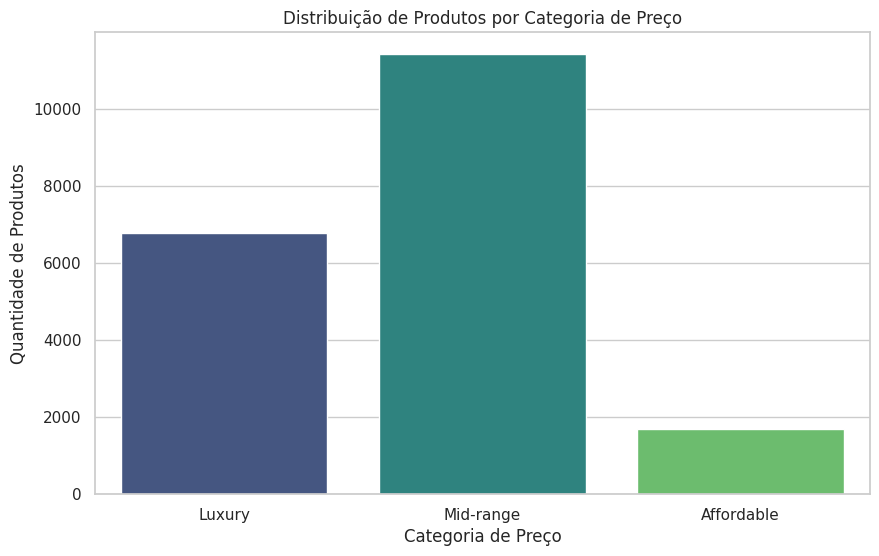

<ipython-input-42-b22016a8239d>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data[data['brand'].isin(top_brands)], x='brand', y='price_usd', palette='muted')


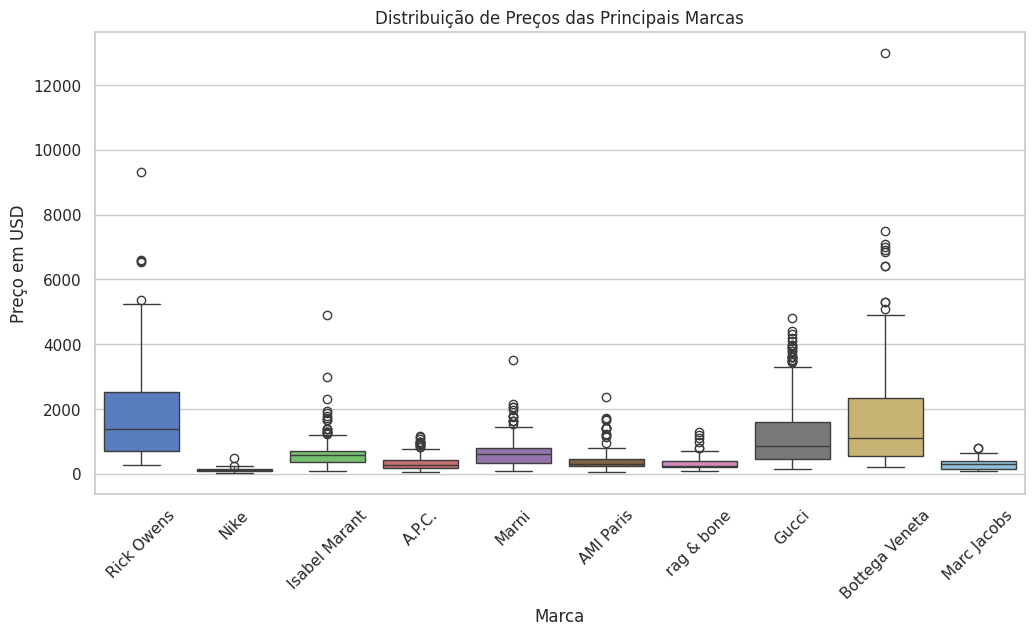

In [ ]:
# configurando o estilo de visualização
sns.set(style="whitegrid")

# plottando a distribuição de preços por categoria
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='price_category', palette='viridis')
plt.title("Distribuição de Produtos por Categoria de Preço")
plt.xlabel("Categoria de Preço")
plt.ylabel("Quantidade de Produtos")
plt.show()

# plottando a distribuição de preços por marca (as 10 marcas mais populares)
top_brands = data['brand'].value_counts().head(10).index
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[data['brand'].isin(top_brands)], x='brand', y='price_usd', palette='muted')
plt.title("Distribuição de Preços das Principais Marcas")
plt.xlabel("Marca")
plt.ylabel("Preço em USD")
plt.xticks(rotation=45)
plt.show()


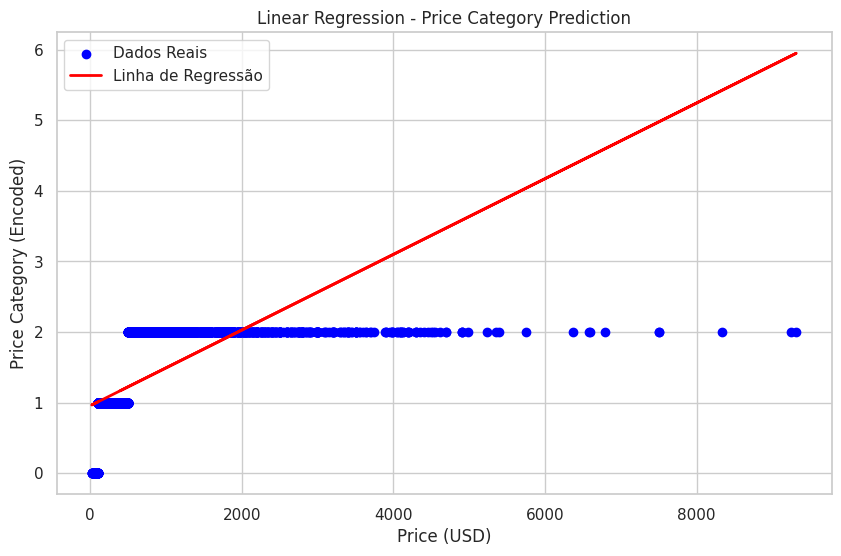

In [ ]:
# fazendo um depara das categorias de preço para valores numéricos
depara_price_category = {
    "Affordable": 0,
    "Mid-range": 1,
    "Luxury": 2
}

data['price_category_encoded'] = data['price_category'].map(depara_price_category)

# selecionar variáveis independentes (X) e o alvo (y)
X = data[['price_usd']]
y = data['price_category_encoded']

# divisão dos dados para treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# treinamento do modelo de regressão
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# fazer previsões nos dados de teste
y_pred = regressor.predict(X_test)

# visualização do gráfico
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Dados Reais')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linha de Regressão')

plt.xlabel('Price (USD)')
plt.ylabel('Price Category (Encoded)')
plt.title('Linear Regression - Price Category Prediction')
plt.legend()
plt.show()

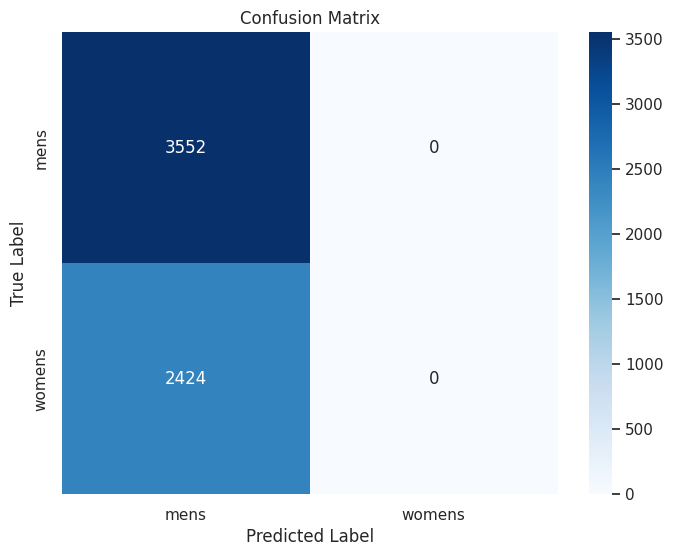

In [ ]:
# codificando variáveis de entrada e saída como exemplos
X = data['brand'].astype('category').cat.codes.values.reshape(-1, 1)  # convertendo para array e adicionando dimensão
y = data['type'].astype('category').cat.codes  # convertendo tipo para códigos numéricos

# divisão dos dados para classificação
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# treinamento do modelo de classificação
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# fazendo previsões com os dados de teste
y_pred = classifier.predict(X_test)

# criando a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# visualização da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data['type'].astype('category').cat.categories, yticklabels=data['type'].astype('category').cat.categories)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [48]:
# demonstrando como poderíamos fazer uma combinação de dados com uma API de câmbio

import requests

# Configuração para buscar a taxa de câmbio do USD para BRL
url = "https://api.exchangerate-api.com/v4/latest/USD"
response = requests.get(url)
exchange_data = response.json()
usd_to_brl = exchange_data["rates"]["BRL"]

# Aplicando a taxa de câmbio ao dataset
data['price_brl'] = data['price_usd'] * usd_to_brl

In [ ]:
# demonstrando uso de API para enriquecimento dos dados
# instala o pacote wikipedia-api
!pip install wikipedia-api

# importa a biblioteca com um user-agent especificado e personalizado
import wikipediaapi
wiki_wiki = wikipediaapi.Wikipedia(language='en', user_agent="DataScienceCP3 (https://github.com/gabitrevis; RM99500@fiap.com.br)")

# função para obter a descrição de uma marca a partir da Wikipedia
def get_brand_info(brand_name):
    page = wiki_wiki.page(brand_name)
    if page.exists():
        return page.summary[:1]  # retorna o primeiro caractere da descrição
    return "Descrição não encontrada"

# cria uma nova coluna 'brand_info' com descrições breves das marcas
data['brand_info'] = data['brand'].apply(get_brand_info)
data.head()

### Teste com Usuário

Informações essenciais: o usuário-teste foi um estudante de Ciências Econômicas, com aproximadamente 20 anos de idade

#### Observações Gerais:
1. **Introdução e Objetivo**
   - A introdução está clara e explica bem o que o projeto pretende fazer, mas incluir uma descrição geral do mercado de moda de luxo (exemplo: crescimento global do setor) poderia ajudar a contextualizar o dataset e o valor da análise.
   - As perguntas de pesquisa estão muito bem formuladas, tornando o propósito da análise claro logo no início.

   **Sugestão de melhoria**: Adicionar uma breve contextualização do mercado de moda de luxo para atrair leitores e situá-los melhor.

2. **Explicações Markdown antes e depois das Células de Código**
   - A maioria das células de código possui introduções e descrições, mas algumas visualizações, especialmente os gráficos, poderiam ter explicações mais detalhadas. Em alguns casos, ficou difícil entender o que o gráfico estava mostrando sem uma explicação clara de cada eixo e variável.

   **Sugestão de melhoria**: Explicar com detalhes o que cada gráfico representa e o que se espera observar em cada um deles.

3. **Combinação de Dados e Enriquecimento com API**
   - Entendi a ideia de categorizar o preço e transformar os valores para uma segunda moeda (BRL), mas como estudante de economia, sugeriria enriquecer a análise com um índice de paridade de poder de compra (PPC), caso esteja disponível, para mostrar o valor dos produtos em diferentes economias.

   **Sugestão de melhoria**: Considerar conectar uma API ou fonte de dados para adicionar uma coluna que considere a PPC em uma moeda específica para oferecer uma análise mais alinhada ao poder aquisitivo de consumidores em diferentes países.

4. **Modelagem e Resultados de Machine Learning**
   - A análise de regressão e classificação é interessante, mas, para leigos em machine learning, talvez fosse interessante incluir um breve resumo dos algoritmos utilizados e como eles funcionam.

   **Sugestão de melhoria**: Adicionar uma breve explicação sobre o que é regressão e classificação, como cada um é aplicado ao problema, e o que o algoritmo está tentando prever. Isso pode ser incluído em um Markdown antes da modelagem.

5. **Visualizações e Análise Descritiva**

   - As visualizações são bem-feitas e ajudam a entender a distribuição dos dados, mas uma legenda para algumas paletas de cores, como as usadas para diferentes faixas de preço e marcas, ajudaria o leitor a interpretar os gráficos com mais facilidade.

   **Sugestão de melhoria**: Adicionar legendas ou breves explicações em gráficos que mostrem distribuições ou categorias (como preço) e que usam cores para diferenciar as faixas.

6. **Conclusão**

   - A conclusão resume bem os insights principais, mas incluir uma lista final de respostas para as perguntas de pesquisa daria mais coesão. Isso ajudaria quem está revisando a identificar quais questões foram respondidas diretamente e quais podem ter tido limitações.

   **Sugestão de melhoria**: Revisitar as perguntas de pesquisa no final e fazer uma breve síntese dos achados para cada pergunta.

#### Ações Tomadas

Com base nesse feedback, nós percebemos que podemos:

- Adicionar contexto na introdução sobre o mercado de moda de luxo.
- Incluir explicações detalhadas antes e após cada visualização.
- Explorar uma API para incluir dados sobre o PPC ou outras métricas econômicas.
- Incluir uma explicação breve sobre os modelos de ML e o que está sendo previsto.
- Revisar a conclusão, respondendo a cada pergunta de pesquisa com os insights alcançados.

E esses ajustes ajudariam a tornar o notebook mais compreensível para leitores com menos experiência técnica e ampliariam o contexto da análise.

#Conclusão

Este estudo ofereceu uma visão abrangente sobre o mercado de moda premium, explorando tanto padrões de preços quanto a segmentação por marca e tipo de público. Ao categorizar os produtos em faixas de preço e implementar algoritmos de machine learning para prever categorias de preço e tipos de produto, foi possível responder a perguntas relevantes sobre o comportamento de marcas e consumidores.

A análise visual dos dados e a validação dos modelos reforçam a utilidade de ferramentas estatísticas e de machine learning para a interpretação e previsão de tendências em um mercado competitivo. Além disso, o enriquecimento do dataset com a conversão de valores e a criação de categorias proporcionou uma análise comparativa entre o mercado americano e outros mercados potenciais. Com a metodologia aplicada, os insights adquiridos podem ser aproveitados para futuras estratégias de precificação, segmentação de marketing e otimização de portfólio de produtos, tornando o processo de análise de dados fundamental para empresas que buscam maior precisão em suas decisões.